In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 1000)
pd.options.display.float_format = '{:.2f}'.format

In [3]:
cleaned_cust_data  = pd.read_excel("../input/feature-engineering/cleaned_cust_data.xlsx")
cleaned_cust_data.drop(['Unnamed: 0'],1,inplace=True)
cleaned_cust_data.head()

,Business Partner,Customer No.,Partner Type,Data Origin,Title
0,31,1,1.00,Z001,nan
1,32,2,1.00,Z005,nan
2,34,4,1.00,Z005,nan
3,35,5,1.00,Z005,nan
4,42,7,1.00,Z008,nan


In [4]:
cleaned_jtd_data  = pd.read_csv("../input/feature-engineering/cleaned_jtd_data.csv")
cleaned_jtd_data.drop(['Unnamed: 0'],1,inplace=True)
cleaned_jtd_data.head()

,DBM Order,Order Item,Material,Description,Item Category,Order Quantity,Target quantity UoM,Net value
0,22385,180,OSLCC_SRV31,MACHINING RR.SUSPENSION CHARGE (MAJOR),P010,1.20,MIN,1869.87
1,23910,10,1DM279018170117,ASSY.OIL COOLER (6-PLATE) (VOR,P002,1.00,EA,2151.13
2,23910,40,1IS150203BE01,FRONT WHEEL BEARING/ LUBRICATE,P002,1.00,EA,2552.92
3,23910,60,1DM279001990173,ASSY.CYL.HEAD W /O INJ.(NA W /O,P002,1.00,EA,20360.14
4,23910,70,1DM88552790S001SA,Engine Overhaul Kit -Indica Di,P002,1.00,EA,10691.63


In [5]:
cleaned_plant_data  = pd.read_excel("../input/feature-engineering/cleaned_plant_data.xlsx")
cleaned_plant_data.drop(['Unnamed: 0'],1,inplace=True)
cleaned_plant_data.head()

,Plant,Name 1,House number and street,Postal Code,City,Sales organization,State
0,BC07,NERKUNDRAM,"No.117 Poonamallee High Road,",600107,Chennai,MFCS,Tamil Nadu
1,BC30,SAS NAGAR - MOHALI,"C-118, Phase 07,",160055,Mohali,MFCS,Punjab
2,X001,X001 - AUTO PLANET WHEELS,"Unit No.3, Kothari Compound,",400610,Thane,MFCA,Maharashtra
3,X002,X002 - BHANDARI INDUSTRIES PVT,"18/1, C Site 4, Sahibabad",201010,Ghaziabad,MFCA,Uttar Pradesh
4,X003,X003 - Om Sri Satya Sai Automo,"#75, Sy.No. 83/2, Panathur Mai",560087,Bengaluru,MFCB,Karnataka


In [6]:
modified_invoice_data = pd.read_csv("../input/feature-engineering/modified_invoice_data.csv")
modified_invoice_data.drop(['Unnamed: 0'],1,inplace=True)
modified_invoice_data.head()

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Job Card No,Cust Type,Customer No.,Gate Pass Time,Invoice Date,Invoice No,Invoice Time,JobCard Date,JobCard Time,KMs Reading,Labour Total,Make,Misc Total,Model,OSL Total,Order Type,Parts Total,Pin code,Plant,Plant Name1,Print Status,Recovrbl Exp,Regn No,Technician Name,Total Amt Wtd Tax.,User ID,Invoice,Job Card,service_time,clean_District,clean_CITY,Age of cars,Month,Year,Day,Season
0,4,Retail,E4981,00:00:00,2012-04-07,7000000285,15:23:22,2012-04-01,16:14:12,191383,3455.92,MAHINDRA & MAHINDRA,100.00,LOGAN P,2399.95,Running Repairs,11042.62,600032,BC01,THANE,NO,0.00,MH03F9574,4303509,16998.49,SFI_ANANDT,2012-04-07 15:23:22,2012-04-01 16:14:12,143.15,Tamil Nadu,Chennai,13-15,4,2012,1,Summer
1,5,Retail,10,00:00:00,2012-04-04,7000000091,15:55:29,2012-04-02,12:45:04,105073,2310.47,GENERAL MOTORS,0.00,OPTRA,0.00,Paid Service,1469.33,400093,BC01,THANE,NO,0.00,MH43A5790,NaN,3779.80,GOLIVE,2012-04-04 15:55:29,2012-04-02 12:45:04,51.17,Maharashtra,Mumbai,7-9,4,2012,2,Summer
2,6,Retail,7,00:00:00,2012-04-02,7000000016,17:44:03,2012-04-02,12:47:59,137832,1340.37,MAHINDRA & MAHINDRA,0.00,SCORPIO CRDE,0.00,Paid Service,0.00,500038,BC04,BALANAGAR,NO,0.00,AP11AB0153,NaN,1340.37,GOLIVE,2012-04-02 17:44:03,2012-04-02 12:47:59,4.93,Telangana,Hyderabad,10-12,4,2012,2,Summer
3,7,Retail,11,00:00:00,2012-04-03,7000000038,12:42:33,2012-04-02,13:12:04,136240,167.36,MAHINDRA & MAHINDRA,0.00,SCORPIO CRDE,0.00,Running Repairs,0.00,422001,BC03,NASHIK,NO,0.00,MH15BD5265,NaN,167.36,GOLIVE,2012-04-03 12:42:33,2012-04-02 13:12:04,23.51,Maharashtra,Nashik,10-12,4,2012,2,Summer
4,8,Retail,E12096,00:00:00,2012-04-03,7000000031,10:48:06,2012-04-02,13:58:20,140260,200.02,HYUNDAI,0.00,VERNA,0.00,Running Repairs,2106.92,422007,BC03,NASHIK,NO,0.00,MH15CD961,NaN,2306.94,BC03SA2,2012-04-03 10:48:06,2012-04-02 13:58:20,20.83,Maharashtra,Nashik,10-12,4,2012,2,Summer


- ***Customer Lifetime value***: Customer lifetime value is the metric that indicates the total revenue a business can reasonably expect from a single customer account.

We are going to calculate CLTV based on Make, Model of a particular customer for year 2013-2015 for only Running type orders

- Formula: 

LTV = (average order value * purchase frequency)/churn rate

Average order value = Money spent / Number of transactions

Purchase frequency = Total number of transactions / Total number of customers

Repeat rate = Number of customers that have come more than once/ Total customers

Churn rate = 1 - Repeat rate

For this case, we have calculated LTV of a particular customer based on their car make and model. 

So,
LTV = average_order_value (for a single customer) * Purchase Frequency (for a single customer)

1) Finding CLTV of a customer based on Make and Model.

- Note: Model has 1524 missing values. To handle this we tried to impute Model values based on Customer no. and car manufacturer of a customer is using.

- Reason: There is chances a single customer can have more than one car of different car manufacturer. Using that data we can impute remaining Model values of that customer.

- Problem: 

>While trying to impute Model values using above mentioned method groupby is taking too long to execute. To solve this we tried to find out how many customers are there who has visited more than once as we can impute Model of a particular customer based on previous visit data.

>We can see that there are 292 customers who has visited more than once and who has missing data in Model feature. Out of 292 customers only 37 customers has atleast one Model value which can be used to impute remaining Model values of that customer. But this will impute only 146 values out of 1524.

- Workaround: Imputed Model values based on only Car manufacturer.

2) Forming Clusters based on CLTV

3) Applying models to predict CLTV

In [7]:
null_values = modified_invoice_data[modified_invoice_data['Model'].isnull()]
null_values.shape

(1524, 36)

Total unique cust having missing values

In [8]:
cno = list(null_values['Customer No.'].value_counts().index)
len(cno)

701

- This should work but groupby taking too long to execute

In [9]:
testing = modified_invoice_data.copy()

In [10]:
# def fill_null(x):
#     if sum(x.value_counts().values)>0:
#         return x.fillna(x.mode()[0])

# clean_model_dem = testing.groupby(['Customer No.','Make'])
# clean_model = testing.groupby(['Customer No.','Make'],as_index = False).transform(lambda x: fill_null(x))

In [11]:
print("Total Customers who have visited more than one time: ", sum(null_values['Customer No.'].value_counts()>1))

Total Customers who have visited more than one time:  292


In [12]:
nul = (null_values['Customer No.'].value_counts()>1)*1
nul = pd.DataFrame(nul)
nul.reset_index(inplace = True)
nul.head()

,index,Customer No.
0,34250,1
1,32767,1
2,36142,1
3,37068,1
4,150315,1


In [13]:
cno_1 = list(nul[nul['Customer No.'] == 1]['index'])
print("Total Customers who have visited more than once: ", len(cno_1))

Total Customers who have visited more than once:  292


In [14]:
cno_0 = list(nul[nul['Customer No.']==0]['index'])
print("Total unique customers who have visited only once: ", len(cno_0))

Total unique customers who have visited only once:  409


In [15]:
# for i in cno_0:
#     car = testing.loc[testing['Customer No.'] == i, 'Make'].values[0]
#     testing.loc[testing['Customer No.'] == i, 'Model'] = make_model[car]

In [16]:

import time
start = time.time()

repeat = []
values = []
print("Total customers who has visited more than once: ", len(cno_1))
for i in cno_1:
    if (sum(pd.notna(testing[testing['Customer No.'] == i]['Model'])) == 0):
        repeat.append(1)
    else:
        values.append(testing[testing['Customer No.'] == i]['Model'].isnull().sum())
        repeat.append(0)
print("Total customers visited more than once have all NaN values in Model:", sum(repeat))
print("Total Nan values which can be imputed using Make of a particular customers: ", sum(values))
end = time.time()

print(end-start)

Total customers who has visited more than once:  292
Total customers visited more than once have all NaN values in Model: 255
Total Nan values which can be imputed using Make of a particular customers:  146
24.065647840499878


In [17]:
# for i in cno_1:
#     if (sum(pd.notna(testing[testing['Customer No.'] == i]['Model'])) == 0):
#         continue
#     new_df = testing[testing['Customer No.'] == i]
#     testing.loc[testing['Customer No.']==i, 'Model'] = new_df.groupby(['Customer No.','Make']).tranform(lambda x:x.fillna(x.mode()[0]))
    

Filling all Model missing values with car manufacturer types

In [18]:
modified_invoice_data['Model'] = modified_invoice_data.groupby('Make')['Model'].transform(lambda x: x.fillna(x.mode()[0]))
modified_invoice_data['Model'].isnull().sum()

0

Calculating CLTV

In [19]:
new_invoice = modified_invoice_data[modified_invoice_data['Year'].isin([2013,2014,2015])]
new_invoice.shape

(276768, 36)

In [20]:
new_invoice = new_invoice[new_invoice['Order Type']=='Running Repairs']
new_invoice.shape

(155282, 36)

In [21]:
new_invoice.head()

,Job Card No,Cust Type,Customer No.,Gate Pass Time,Invoice Date,Invoice No,Invoice Time,JobCard Date,JobCard Time,KMs Reading,Labour Total,Make,Misc Total,Model,OSL Total,Order Type,Parts Total,Pin code,Plant,Plant Name1,Print Status,Recovrbl Exp,Regn No,Technician Name,Total Amt Wtd Tax.,User ID,Invoice,Job Card,service_time,clean_District,clean_CITY,Age of cars,Month,Year,Day,Season
18623,18855,Retail,8301,00:00:00,2013-01-19,7000020607,17:26:58,2013-01-01,11:34:23,73529,929.00,GENERAL MOTORS,0.00,OPTRA,810.00,Running Repairs,4266.73,400093,BC11,ANDHERI,NO,0.00,MH04BS4422,NaN,6005.73,BC11FS1,2013-01-19 17:26:58,2013-01-01 11:34:23,437.88,Maharashtra,Mumbai,4-6,1,2013,1,Winter
18628,18860,Retail,4335,00:00:00,2013-01-03,7000019164,15:45:08,2013-01-02,12:05:14,14219,125.00,HYUNDAI,0.00,I20,2499.96,Running Repairs,2266.30,400093,BC11,ANDHERI,NO,0.00,TN07BF1100,NaN,4891.26,BC11FS1,2013-01-03 15:45:08,2013-01-02 12:05:14,27.66,Maharashtra,Mumbai,1-3,1,2013,2,Winter
18712,18945,Retail,8306,00:00:00,2013-01-01,7000019057,14:49:41,2013-01-01,11:41:31,123346,148.58,TATA MOTORS,0.00,INDICA,0.00,Running Repairs,0.00,600125,BC06,GUINDY,NO,0.00,TN10J0394,NaN,148.58,BC06SA2,2013-01-01 14:49:41,2013-01-01 11:41:31,3.14,Tamil Nadu,Kanchipuram,7-9,1,2013,1,Winter
18720,18953,Retail,E21494,00:00:00,2013-01-02,7000019071,12:19:37,2013-01-01,15:03:39,77833,180.00,MARUTI SUZUKI,750.03,SWIFT DZIRE,0.00,Running Repairs,384.31,600095,BC07,NERKUNDRAM,NO,0.00,TN20BY291,NaN,1314.34,BC07SA1,2013-01-02 12:19:37,2013-01-01 15:03:39,21.27,Tamil Nadu,Tiruvallur,4-6,1,2013,1,Winter
18721,18954,Retail,8313,00:00:00,2013-01-19,7000020560,10:38:05,2013-01-01,15:34:19,52584,2369.91,MAHINDRA & MAHINDRA,0.00,XYLO,0.00,Running Repairs,6807.97,600107,BC07,NERKUNDRAM,NO,0.00,TN01AJ0750,NaN,9177.88,BC07SA1,2013-01-19 10:38:05,2013-01-01 15:34:19,427.06,Tamil Nadu,Tiruvallur,4-6,1,2013,1,Winter


In [22]:
cltv=new_invoice.groupby(["Customer No.","Make","Model"], as_index=False).agg({"Invoice No":'count',"Total Amt Wtd Tax.":'mean'})

In [23]:
cltv.columns = ['Customers','make','model','num_of_transactions','avg_purchase_value']

In [24]:
cltv['LTV'] = cltv['num_of_transactions'] * cltv['avg_purchase_value']
cltv.head(10)

,Customers,make,model,num_of_transactions,avg_purchase_value,LTV
0,1,MARUTI SUZUKI,OMNI,1,0.00,0.00
1,1000,MARUTI SUZUKI,ALTO,2,598.09,1196.17
2,10000,MARUTI SUZUKI,WAGONR,4,183.56,734.23
3,100001,MAHINDRA & MAHINDRA,BOLERO,1,697.59,697.59
4,100001,SKODA,SUPERB,1,1058.44,1058.44
5,100002,FORD,FIGO,1,0.00,0.00
6,100004,HYUNDAI,I20,1,249.22,249.22
7,100007,HYUNDAI,VERNA,1,299.92,299.92
8,100008,TATA MOTORS,VISTA,2,1039.90,2079.81
9,100009,MARUTI SUZUKI,WAGONR,1,488.18,488.18


2) Forming clusters based on LTV

In [25]:
cltv.columns

Index(['Customers', 'make', 'model', 'num_of_transactions', 'avg_purchase_value', 'LTV'], dtype='object')

In [26]:
X = cltv[['num_of_transactions', 'avg_purchase_value', 'LTV']].copy()

In [27]:
sc = MinMaxScaler()
X = pd.DataFrame(sc.fit_transform(X))
X.columns = ['num_of_transactions', 'avg_purchase_value', 'LTV']
X.head()

,num_of_transactions,avg_purchase_value,LTV
0,0.00,0.00,0.00
1,0.00,0.00,0.00
2,0.01,0.00,0.00
3,0.00,0.00,0.00
4,0.00,0.01,0.00


In [28]:
wcss = []
for i in range(2,11):
    kmeans = KMeans(n_clusters=i , random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

Text(0.5, 0, 'Number of Clusters')

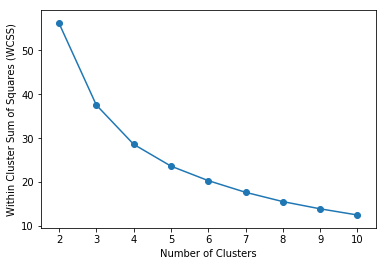

In [29]:
x=np.arange(2,11)
plt.plot(x,wcss)
plt.scatter(x,wcss)
plt.ylabel("Within Cluster Sum of Squares (WCSS)")
plt.xlabel("Number of Clusters")

In [30]:
kmeans_final = KMeans(n_clusters=6, random_state=42)
kmeans_final.fit(X)
cltv['clusters'] = kmeans_final.predict(X)

/opt/conda/lib/python3.6/site-packages/seaborn/regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


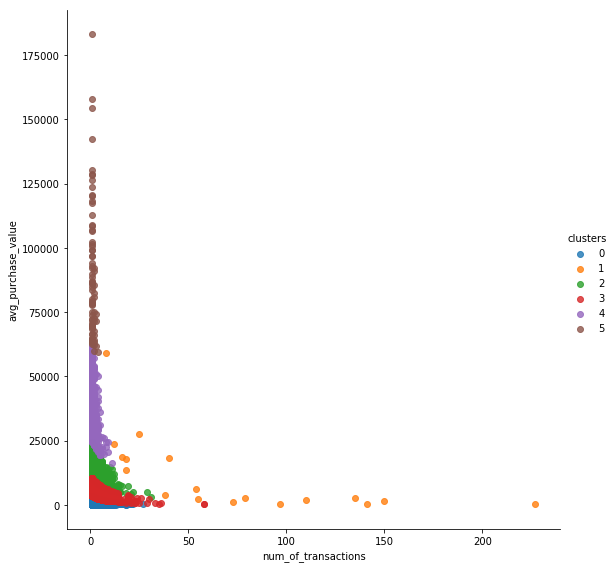

In [31]:
sns.lmplot(data= cltv, x = 'num_of_transactions', y='avg_purchase_value',fit_reg=False,hue = 'clusters', legend_out = True, size = 8)

In [32]:
pca = PCA(n_components=2)
pca_df = pca.fit_transform(X)
pca_df = pd.DataFrame(pca_df, columns = ['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-0.02,-0.00
1,-0.01,0.00
2,-0.01,0.01
3,-0.01,-0.00
4,-0.01,-0.00


In [33]:
pca_df['clusters'] = cltv['clusters'].copy()

/opt/conda/lib/python3.6/site-packages/seaborn/regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


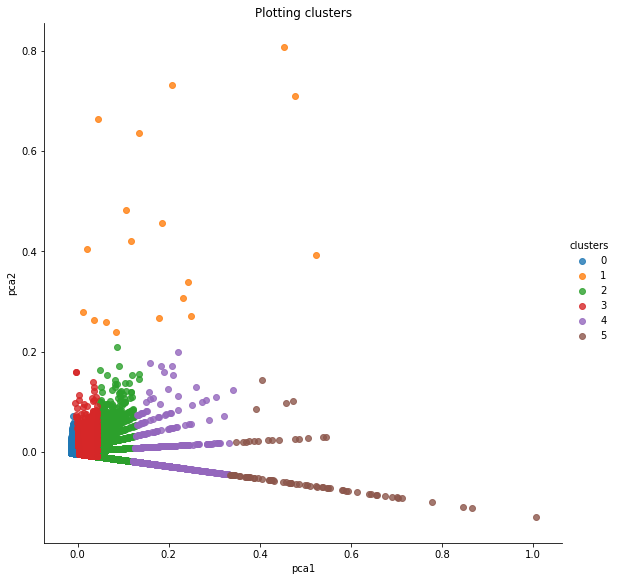

In [34]:
sns.lmplot(x = 'pca1', y = 'pca2', hue = 'clusters', data = pca_df, legend_out=True, fit_reg=False, size = 8)
plt.title("Plotting clusters")
plt.show()

In [35]:
cltv_1 = cltv.copy()
cltv_1.head()

,Customers,make,model,num_of_transactions,avg_purchase_value,LTV,clusters
0,1,MARUTI SUZUKI,OMNI,1,0.00,0.00,0
1,1000,MARUTI SUZUKI,ALTO,2,598.09,1196.17,0
2,10000,MARUTI SUZUKI,WAGONR,4,183.56,734.23,0
3,100001,MAHINDRA & MAHINDRA,BOLERO,1,697.59,697.59,0
4,100001,SKODA,SUPERB,1,1058.44,1058.44,0


In [36]:
le = LabelEncoder()
cltv_1['make'] = le.fit_transform(cltv_1['make'])
cltv_1['model'] = le.fit_transform(cltv_1['model'])

In [37]:
X = cltv_1.drop(['Customers','clusters'],1)
X1 = cltv_1.drop(['Customers','clusters'],1)
X.head()

,make,model,num_of_transactions,avg_purchase_value,LTV
0,13,123,1,0.00,0.00
1,13,15,2,598.09,1196.17
2,13,200,4,183.56,734.23
3,12,29,1,697.59,697.59
4,22,174,1,1058.44,1058.44


In [38]:
sc = MinMaxScaler()
X = sc.fit_transform(X)
X = pd.DataFrame(X)
X.columns = X1.columns

In [39]:
X.head()

,make,model,num_of_transactions,avg_purchase_value,LTV
0,0.48,0.58,0.00,0.00,0.00
1,0.48,0.07,0.00,0.00,0.00
2,0.48,0.94,0.01,0.00,0.00
3,0.44,0.14,0.00,0.00,0.00
4,0.81,0.82,0.00,0.01,0.00


Text(0.5, 0, 'Number of Clusters')

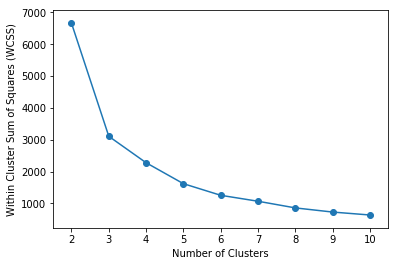

In [40]:
wcss = []
for i in range(2,11):
    kmeans = KMeans(n_clusters=i , random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
x=np.arange(2,11)
plt.plot(x,wcss)
plt.scatter(x,wcss)
plt.ylabel("Within Cluster Sum of Squares (WCSS)")
plt.xlabel("Number of Clusters")

In [41]:
kmeans_final = KMeans(n_clusters=6, random_state=42)
kmeans_final.fit(X)
cltv_1['clusters1'] = kmeans_final.predict(X)

In [42]:
cltv_1.head()

,Customers,make,model,num_of_transactions,avg_purchase_value,LTV,clusters,clusters1
0,1,13,123,1,0.00,0.00,0,5
1,1000,13,15,2,598.09,1196.17,0,0
2,10000,13,200,4,183.56,734.23,0,1
3,100001,12,29,1,697.59,697.59,0,0
4,100001,22,174,1,1058.44,1058.44,0,4


/opt/conda/lib/python3.6/site-packages/seaborn/regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


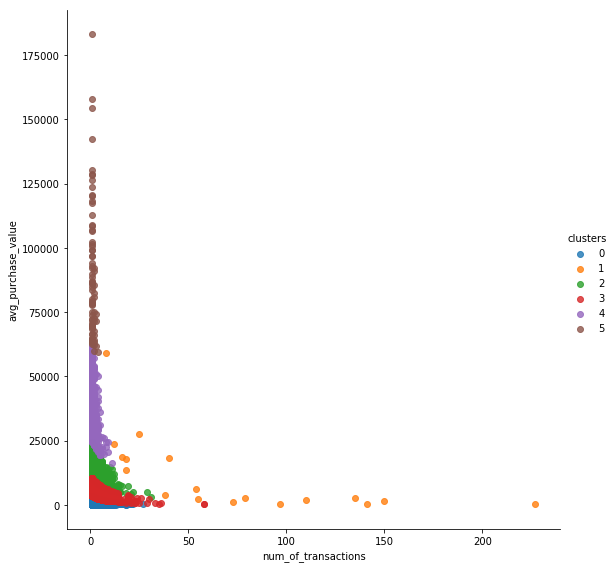

In [43]:
sns.lmplot(data= cltv_1, x = 'num_of_transactions', y='avg_purchase_value',fit_reg=False,hue = 'clusters', legend_out = True, size = 8)

In [44]:
pca = PCA(n_components=2)
pca_df = pca.fit_transform(X)
pca_df = pd.DataFrame(pca_df, columns = ['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-0.03,0.01
1,0.47,-0.04
2,-0.39,0.04
3,0.41,0.01
4,-0.30,-0.30


In [45]:
pca_df['clusters'] = cltv_1['clusters1']

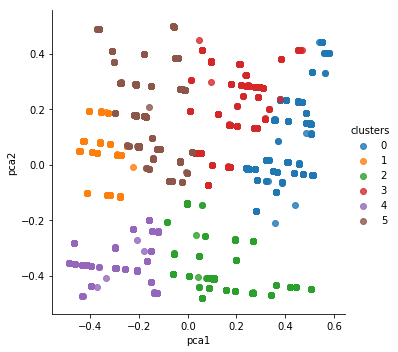

In [46]:
sns.lmplot(data= pca_df, x = 'pca1', y='pca2',fit_reg=False,hue = 'clusters', legend_out = True)

3) Applying models to predict CLTV

In [47]:
cltv.head()

,Customers,make,model,num_of_transactions,avg_purchase_value,LTV,clusters
0,1,MARUTI SUZUKI,OMNI,1,0.00,0.00,0
1,1000,MARUTI SUZUKI,ALTO,2,598.09,1196.17,0
2,10000,MARUTI SUZUKI,WAGONR,4,183.56,734.23,0
3,100001,MAHINDRA & MAHINDRA,BOLERO,1,697.59,697.59,0
4,100001,SKODA,SUPERB,1,1058.44,1058.44,0


In [48]:
print(cltv[(cltv['LTV']>-1) & (cltv['LTV']<=1096.24)].shape)
print(cltv[(cltv['LTV']>1096.24) & (cltv['LTV']<=4247.26)].shape)
print(cltv[(cltv['LTV']>4247.26) & (cltv['LTV']<=732727.59)].shape)

(49154, 7)
(24576, 7)
(24577, 7)


In [49]:
bins=[-1,1096.24,4247.26,732727.60]
labels=["Low","Medium","High"]
cltv["LTV Binned"]=pd.cut(cltv['LTV'], bins=bins, labels=labels)

In [50]:
cltv['LTV Binned'].value_counts()

Low       49154
High      24577
Medium    24576
Name: LTV Binned, dtype: int64

In [51]:
cltv['Location'] = modified_invoice_data['clean_CITY'].copy()
cltv['service_time'] = modified_invoice_data['service_time'].copy()

In [52]:
cltv.dropna(inplace=True)

In [53]:
X = cltv.drop(['Customers','LTV', 'clusters', 'LTV Binned','num_of_transactions'],1)
target = cltv['LTV Binned']

In [54]:
le = LabelEncoder()
X['make'] = le.fit_transform(X['make'])
X['model'] = le.fit_transform(X['model'])
X['Location'] = le.fit_transform(X['Location'])
X.head()

,make,model,avg_purchase_value,Location,service_time
0,13,122,0.00,29,143.15
1,13,14,598.09,98,51.17
2,13,198,183.56,57,4.93
3,12,28,697.59,106,23.51
4,22,172,1058.44,106,20.83


In [55]:
sc = MinMaxScaler()
X1 = X.copy()
X = pd.DataFrame(sc.fit_transform(X))
X.columns = X1.columns
X.head()

,make,model,avg_purchase_value,Location,service_time
0,0.48,0.58,0.00,0.18,0.01
1,0.48,0.07,0.00,0.60,0.00
2,0.48,0.94,0.00,0.35,0.00
3,0.44,0.13,0.00,0.65,0.00
4,0.81,0.82,0.01,0.65,0.00


In [56]:
target.value_counts()

Low       43595
Medium    21797
High      21781
Name: LTV Binned, dtype: int64

In [57]:
target = target.map({'Low':0, 'Medium':1, 'High': 2})
target.value_counts()

0    43595
1    21797
2    21781
Name: LTV Binned, dtype: int64

In [58]:
X_train,X_test,y_train,y_test=train_test_split(X,target,test_size=0.3,random_state=42)

In [59]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred_rfc=rfc.predict(X_test)

In [60]:
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     13127
           1       0.72      0.72      0.72      6464
           2       0.90      0.75      0.81      6561

    accuracy                           0.86     26152
   macro avg       0.84      0.82      0.83     26152
weighted avg       0.86      0.86      0.86     26152



In [61]:
print(accuracy_score(y_test,y_pred_rfc))

0.859092994799633


<BarContainer object of 5 artists>

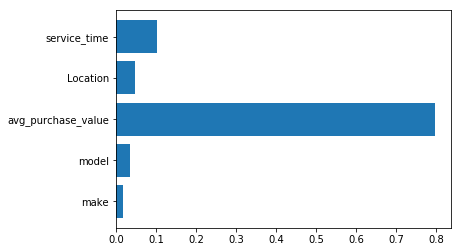

In [62]:
plt.barh(list(X),list(rfc.feature_importances_))

In [63]:
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
y_pred_xgb=xgb.predict(X_test)

In [64]:
accuracy_score(y_test,y_pred_xgb)

0.8634521260324258

In [65]:
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     13127
           1       0.72      0.75      0.74      6464
           2       0.94      0.71      0.81      6561

    accuracy                           0.86     26152
   macro avg       0.86      0.82      0.83     26152
weighted avg       0.87      0.86      0.86     26152

